In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
%cd /content/drive/MyDrive/Github/

/content/drive/MyDrive/Github


In [12]:
!git init hendaye_real_estate

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Github/hendaye_real_estate/.git/


In [13]:
%cd hendaye_real_estate

/content/drive/MyDrive/Github/hendaye_real_estate


In [15]:
%ls -a

.git/


In [17]:
!git status

On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)


In [19]:
!git add .

In [20]:
!git status

On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)


# **Dataset 1: Seloger (página web de anuncios inmobiliarios) ASKING PRICE**

## **1. Importar archivo**
---

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Módulo 6 - Machine Learning/Reto ML/curated_list.csv", encoding='utf-8')

df_a_predecir = pd.read_csv("/content/drive/MyDrive/Módulo 6 - Machine Learning/Reto ML/prediccion.csv", encoding='utf-8')
df_a_predecir.head(2)

,id,object,task_id,annonce_id,agency_id,agency_page,agency_contact_name,agency_img_url,agency_phone_number,agency_has_email,...,short_description,transaction_type,tags,url,virtual_visit_url,collected_at,input_url,sold,selling_time,old_price
0,6000000,result,42424242,424242424,424242,https://www.seloger.com/professionnels/agences...,agence MaItMUGaN,NaN,06 50 04 22 54,t,...,NaN,2,"2 pieces, 1 chambre, 42m2, etage ½, terrasse...",NaN,,NaN,,n,,NaN


## **2. Limpieza y normalización de datos**
---

## a) Supresión de identificadores y demás variables no relevantes (por ejemplo aquellas cuya información está repetida o que tienen muchos valores en blanco o nulos).

In [ ]:
df.columns.tolist()

['id',
 'object',
 'task_id',
 'annonce_id',
 'agency_id',
 'agency_page',
 'agency_contact_name',
 'agency_img_url',
 'agency_phone_number',
 'agency_has_email',
 'agency_link',
 'address',
 'area',
 'bedrooms_count',
 'business_unit',
 'coownership_annual_charges',
 'coownership_number_of_lots',
 'coownership_is_syndic_procedure',
 'contact_is_private_seller',
 'contact_email',
 'description',
 'district',
 'dpe',
 'estate_type',
 'electricity_consumption',
 'estate_type_id',
 'ges',
 'gas_emissions',
 'highlighting_level',
 'insee_code',
 'is_furnished',
 'is_exclusive',
 'is_expired',
 'monthly_price',
 'nature',
 'postal_code',
 'picture_count',
 'price',
 'price_per_meter',
 'price_decrease_percent',
 'publication_id',
 'rooms',
 'short_description',
 'transaction_type',
 'tags',
 'url',
 'virtual_visit_url',
 'collected_at',
 'input_url',
 'sold',
 'selling_time',
 'old_price']

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop(columns=['id','object','task_id','annonce_id','agency_id','agency_page','agency_contact_name','agency_img_url','agency_phone_number','agency_has_email',
                 'agency_link','address','bedrooms_count','business_unit','coownership_annual_charges','coownership_number_of_lots','coownership_is_syndic_procedure',
                 'contact_email','description','electricity_consumption','estate_type_id','gas_emissions','highlighting_level','insee_code','is_expired','monthly_price',
                 'nature','postal_code','picture_count','price_per_meter','publication_id','url','virtual_visit_url','collected_at','input_url'], axis=1, inplace=True)

df_a_predecir.drop(columns=['id','object','task_id','annonce_id','agency_id','agency_page','agency_contact_name','agency_img_url','agency_phone_number','agency_has_email',
                 'agency_link','address','bedrooms_count','business_unit','coownership_annual_charges','coownership_number_of_lots','coownership_is_syndic_procedure',
                 'contact_email','description','electricity_consumption','estate_type_id','gas_emissions','highlighting_level','insee_code','is_expired','monthly_price',
                 'nature','postal_code','picture_count','price_per_meter','publication_id','url','virtual_visit_url','collected_at','input_url'], axis=1, inplace=True)

df.head(2)
df_a_predecir.head()

,area,contact_is_private_seller,district,dpe,estate_type,features,ges,is_furnished,is_exclusive,price_decrease_percent,rooms,short_description,transaction_type,tags,sold,selling_time,old_price
0,42.3,t,Orio,C,appartement,NaN,A,f,t,NaN,2,NaN,2,"2 pieces, 1 chambre, 42m2, etage ½, terrasse...",n,,NaN


## b) Limpieza de las columnas que se mantienen (tratamiento de los valores nulos, ...)

In [ ]:
df.columns.tolist()

['area',
 'contact_is_private_seller',
 'district',
 'dpe',
 'estate_type',
 'ges',
 'is_furnished',
 'is_exclusive',
 'price',
 'price_decrease_percent',
 'rooms',
 'short_description',
 'transaction_type',
 'tags',
 'sold',
 'selling_time',
 'old_price']

In [ ]:
df.isnull().sum()

,0
area,0
contact_is_private_seller,0
district,0
dpe,20
estate_type,0
ges,20
is_furnished,0
is_exclusive,0
price,0
price_decrease_percent,162


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("pastel")

### Variable: AREA

In [ ]:
df.area.isnull().sum()
df.dropna(subset=['area'], inplace=True)

In [ ]:
df.area = df.area.round(0).astype(int)
df_a_predecir.area = df_a_predecir.area.round(0).astype(int)

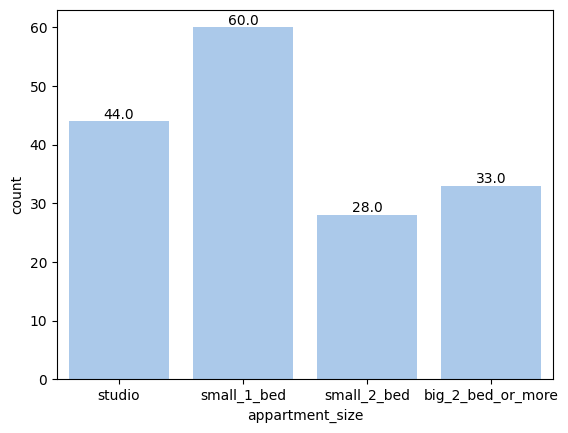

In [ ]:
df["appartment_size"] = pd.cut(df.area, bins=[0,35,49,66,df.area.max()], labels=["studio", "small_1_bed", "small_2_bed", "big_2_bed_or_more"])

ax = sns.countplot(df, x="appartment_size")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

### Variable: CONTACT IS PRIVATE SELLER

In [ ]:
df.contact_is_private_seller.replace(["t", "f"], [1,0], inplace=True)

In [ ]:
df.contact_is_private_seller.value_counts()

,count
contact_is_private_seller,
0,160
1,5


### Variable: DISTRICT

In [ ]:
df.district.replace('Centre Ville-La plage', 'Centre Ville-La Plage',inplace=True)
df_a_predecir.district.replace('Centre Ville - La plage', 'Centre Ville - La Plage',inplace=True)

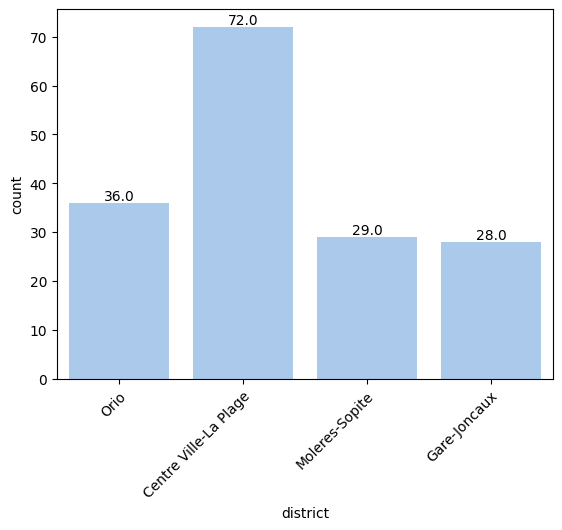

In [ ]:
ax = sns.countplot(df, x="district")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

### Variable: DPE

In [ ]:
df.dpe.fillna('C',inplace=True)
df_a_predecir.dpe.fillna('C',inplace=True)

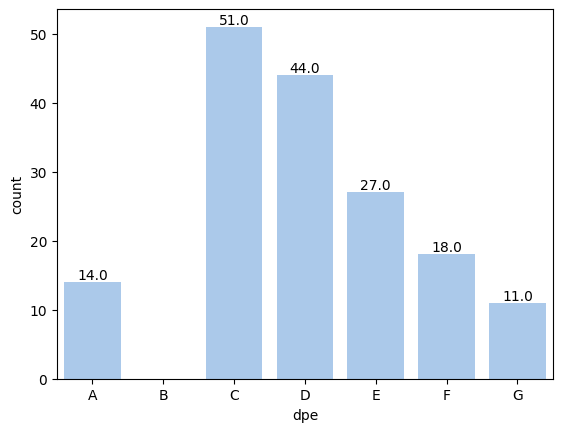

In [ ]:
category_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

ax = sns.countplot(df, x="dpe", order=category_order)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

### Variable: ESTATE TYPE

In [ ]:
df.estate_type.replace('appartement', 'Appartement',inplace=True)
df.estate_type.replace('studio', 'Studio',inplace=True)

# df_a_predecir.estate_type.replace('appartement', 'Appartement',inplace=True)
# df_a_predecir.estate_type.replace('studio', 'Studio',inplace=True)

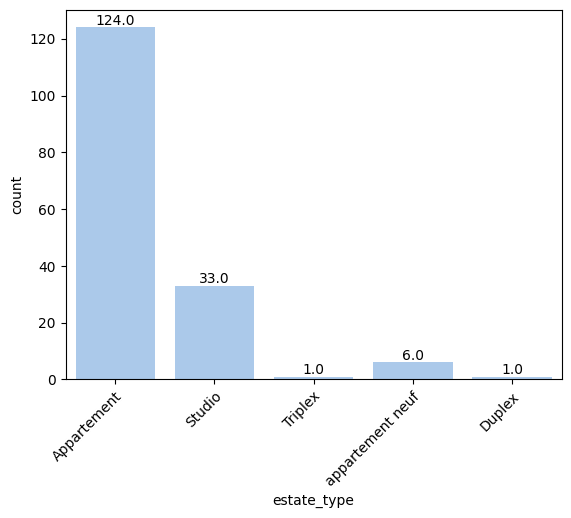

In [ ]:
ax = sns.countplot(df, x="estate_type")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

### Variable: GES

In [ ]:
df.ges.fillna('A',inplace=True)
df_a_predecir.ges.fillna('A',inplace=True)

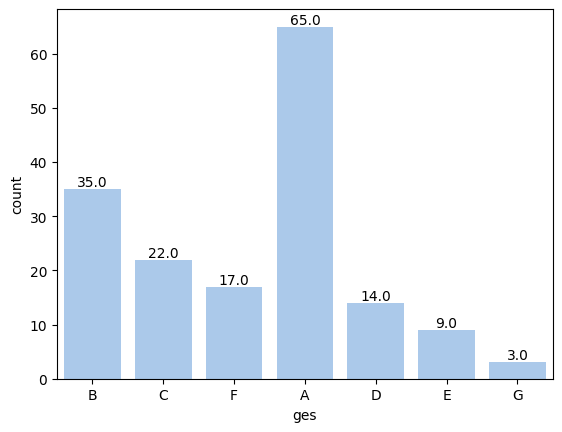

In [ ]:
ax = sns.countplot(df, x="ges")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

### Variable: IS FURNISHED

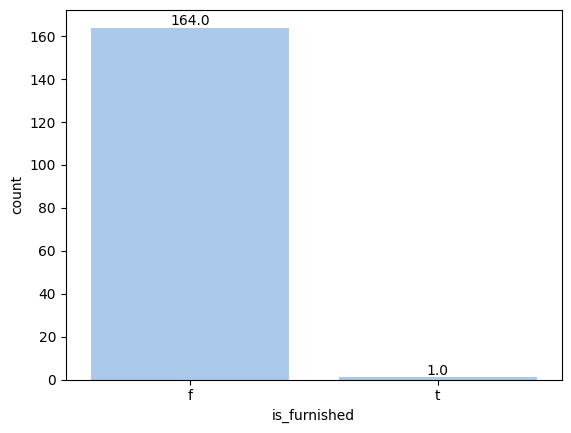

In [ ]:
ax = sns.countplot(df, x="is_furnished")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

### Variable: IS EXCLUSIVE

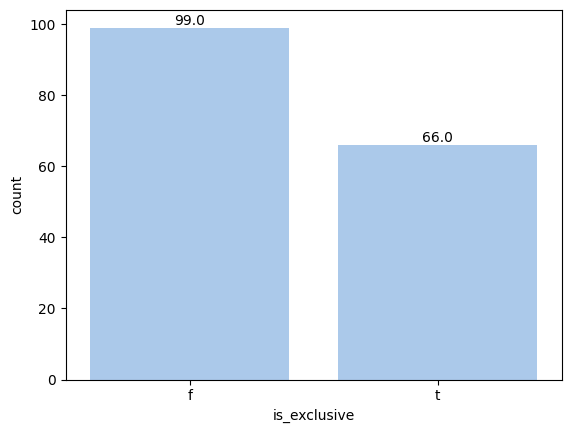

In [ ]:
ax = sns.countplot(df, x="is_exclusive")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

### Variable: PRICE

In [ ]:
df.price.value_counts()

,count
price,
175000,5
150000,5
278200,5
223000,5
195000,4
...,...
215500,1
205000,1
200000,1


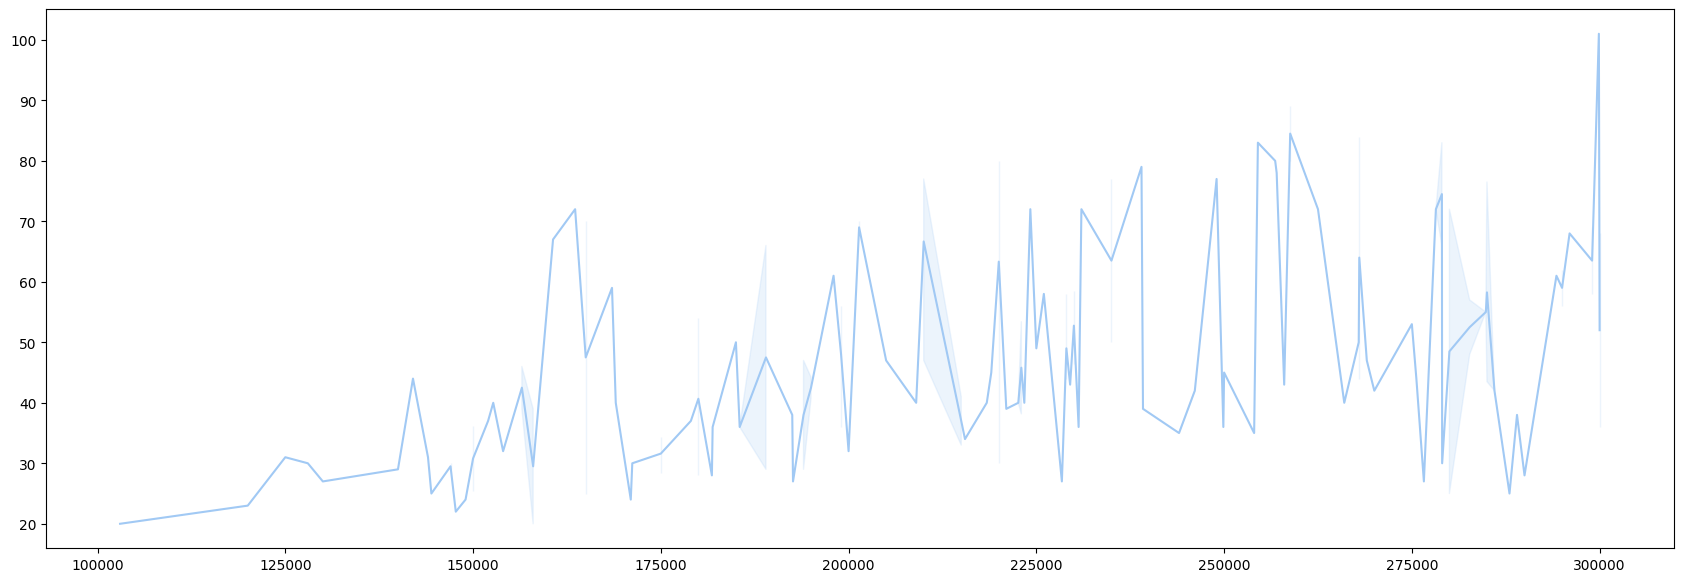

In [ ]:
fig, ax = plt.subplots(figsize=(21, 7))
sns.lineplot(x=df['price'].values, y=df['area'].values, ax=ax)

plt.show()

### <font color='red'>Variable: PRICE DECREASE PERCENT</font>

In [ ]:
df['price_decrease_percent'] = (df['old_price'] - df['price']) * 100 / df['old_price']
df['price_decrease_percent']

,price_decrease_percent
0,6.363636
1,NaN
2,NaN
3,5.185185
4,7.142857
...,...
160,NaN
161,NaN
162,NaN
163,NaN


In [ ]:
df.price_decrease_percent.fillna(0,inplace=True)
df_a_predecir.price_decrease_percent.fillna(0,inplace=True)

In [ ]:
df.price_decrease_percent.isnull().sum()

0

In [ ]:
df['price_decrease_percent'].astype(int)
df_a_predecir['price_decrease_percent'].astype(int)

df.price_decrease_percent.mean()

0.8439877893006474

### Variable: ROOMS

In [ ]:
df.rooms.fillna(1,inplace=True)
df_a_predecir.rooms.fillna(1,inplace=True)

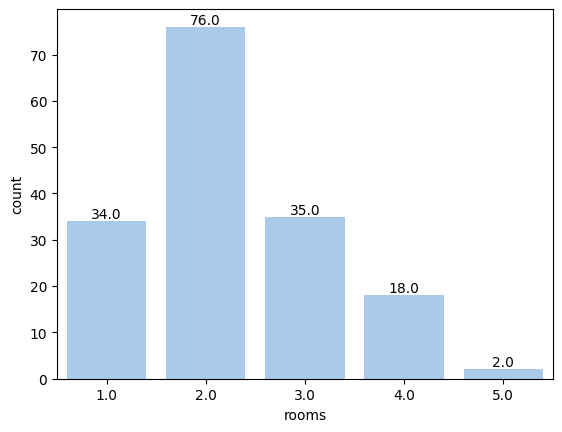

In [ ]:
ax = sns.countplot(df, x="rooms")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

### <font color='red'>Variable: TRANSACTION TYPE</font>

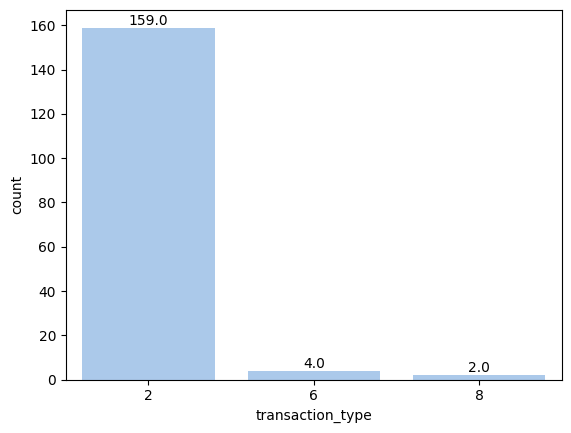

In [ ]:
ax = sns.countplot(df, x="transaction_type")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

### Variable: TAGS (nuevas variables a partir de Tags)

In [ ]:
df.tags
df_a_predecir.tags

,tags
0,"2 pieces, 1 chambre, 42m2, etage ½, terrasse..."


#### Variable PIECES (Estancias)

In [ ]:
df["pieces"] = df.tags.str.split(',').str.get(0)
df_a_predecir["pieces"] = df_a_predecir.tags.str.split(',').str.get(0)

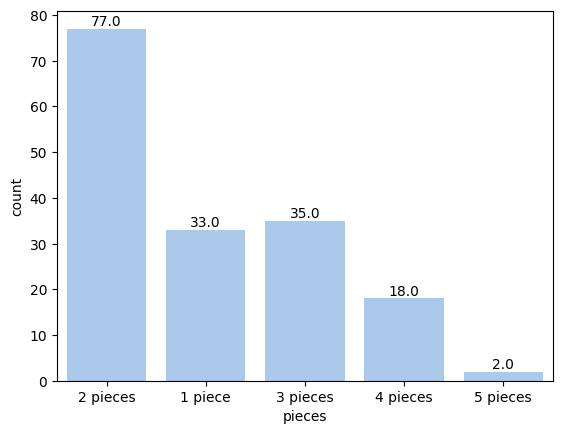

In [ ]:
ax = sns.countplot(df, x="pieces")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

#### Variable CHAMBRES (Habitaciones)

In [ ]:
def extract_chambres(tag):
    # Vérifie si l'entrée est une chaîne de caractères
    if isinstance(tag, str):
        # Vérifie si 'chambre' ou 'chambres' est dans la chaîne de caractères
        if 'chambre' in tag or 'chambres' in tag:
            # Sépare la chaîne par des virgules
            parts = tag.split(',')
            # Parcourt les parties séparées pour trouver la mention de chambres
            for part in parts:
                part = part.strip()  # Supprime les espaces blancs autour
                if 'chambre' in part or 'chambres' in part:
                    return part
    return '0 chambres'

# Applique la fonction à la colonne 'tags'
df['chambres'] = df['tags'].apply(extract_chambres)
df_a_predecir['chambres'] = df_a_predecir['tags'].apply(extract_chambres)

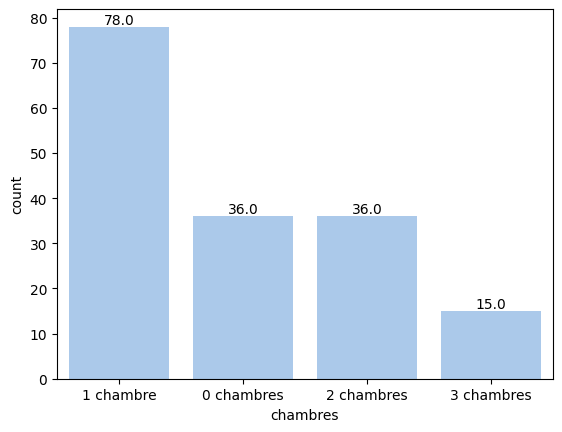

In [ ]:
ax = sns.countplot(df, x="chambres")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

#### Variable ETAGES (piso o altura)

In [ ]:
def extract_etages(tag):
    if isinstance(tag, str):
      # Vérifie si 'chambre' ou 'chambres' est dans la chaîne de caractères
      if 'etage' in tag or 'etages' in tag:
          # Sépare la chaîne par des virgules
          parts = tag.split(',')
          # Parcourt les parties séparées pour trouver la mention de chambres
          for part in parts:
              part = part.strip()  # Supprime les espaces blancs autour
              if 'etage' in part or 'etages' in part:
                  return part
    return '0'

# Applique la fonction à la colonne 'tags'
df['etages'] = df['tags'].apply(extract_etages)
df_a_predecir['etages'] = df_a_predecir['tags'].apply(extract_etages)

In [ ]:
df['etages'] = df['etages'].str.replace('â', '-', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 0/0', '0', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 0/0 ', '0', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 0/2', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 0/1', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 0/3', '3', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 33/0', '3', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 0/4', '4', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 0/5', '5', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 2/0', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 3/0', '3', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 4/0', '4', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 5/0', '5', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 1/0', '5', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 3/-', '3', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 3/–', '3', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 4/-', '4', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 4/–', '4', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 5/-', '5', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 5/–', '5', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 6/-', '6', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 6/–', '6', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 7/–', '6', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 0/-', '0', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 0/–', '0', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 1/-', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 1/–', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 2/-', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 2/–', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 3/–', '3', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 1/2', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 2/2', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 32/3', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 4/1', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 4/2', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 1/3', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 1/4', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 1/5', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 2/3', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 2/4', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 2/5', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 3/3', '3', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 3/4', '3', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 3/5', '3', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 4/4', '4', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 4/5', '4', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 4/6', '4', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 5/5', '5', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 5/1', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 1/1', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 1/6', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 2/6', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 3/6', '3', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 4/6', '4', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 5/6', '5', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 6/6', '6', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage -/0', '0', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage –/0', '0', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage –/1', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage –/2', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage -/3', '3', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage –/3', '3', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage -/4', '4', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage –/4', '4', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage -/5', '5', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 0/6', '6', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 0/7', '0', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 1/7', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 2/7', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 3/7', '3', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 4/7', '4', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 5/7', '5', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 6/7', '6', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 7/7', '7', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 1/8', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 2/8', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 5/8', '5', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 6/8', '6', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 7/8', '7', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 7/9', '7', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 3/2', '2', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 3/1', '1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage -1/1', '-1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage -1/–', '-1', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('etage 7/0', '7', regex=False).str.strip()
df['etages'] = df['etages'].str.replace('unknown', '0', regex=False).str.strip()
df_a_predecir['etages'] = df_a_predecir['etages'].str.replace('etage 1/2', '1', regex=False).str.strip()

In [ ]:
df.etages.value_counts()

,count
etages,
2,41
1,38
0,33
3,25
4,20
5,6
6,1
7,1


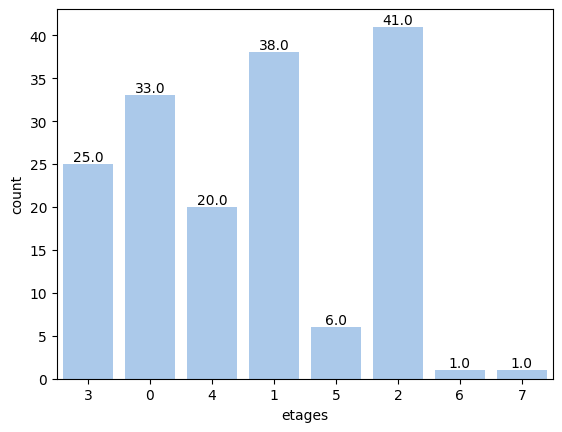

In [ ]:
ax = sns.countplot(df, x="etages")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

#### Variable BALCON

In [ ]:
def extract_balcon(tag):
  if isinstance(tag, str):
    if 'balcon' in tag or 'balcons' in tag:
      return 1
  return 0

# Applique la fonction à la colonne 'tags'
df['balcon'] = df['tags'].apply(extract_balcon)
df_a_predecir['balcon'] = df_a_predecir['tags'].apply(extract_balcon)

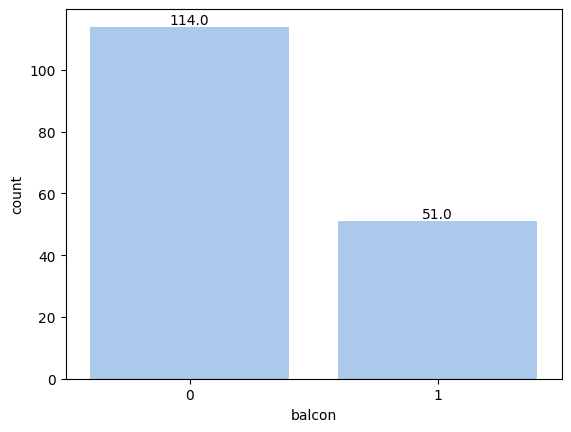

In [ ]:
ax = sns.countplot(df, x="balcon")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

#### Variable TERRASSE (terraza)

In [ ]:
def extract_terrasse(tag):
  if isinstance(tag, str):
    if 'terrasse' in tag:
      return 1
  return 0

# Applique la fonction à la colonne 'tags'
df['terrasse'] = df['tags'].apply(extract_terrasse)
df_a_predecir['terrasse'] = df_a_predecir['tags'].apply(extract_terrasse)

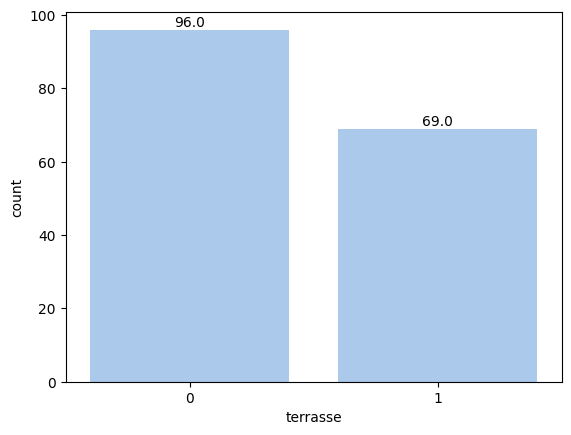

In [ ]:
ax = sns.countplot(df, x="terrasse")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

#### Variable PARKING EXTERIOR

In [ ]:
def extract_parking(tag):
  if isinstance(tag, str):
    if 'parking' in tag or 'parkings' in tag:
      return 1
  return 0

# Applique la fonction à la colonne 'tags'
df['parking'] = df['tags'].apply(extract_parking)
df_a_predecir['parking'] = df_a_predecir['tags'].apply(extract_parking)

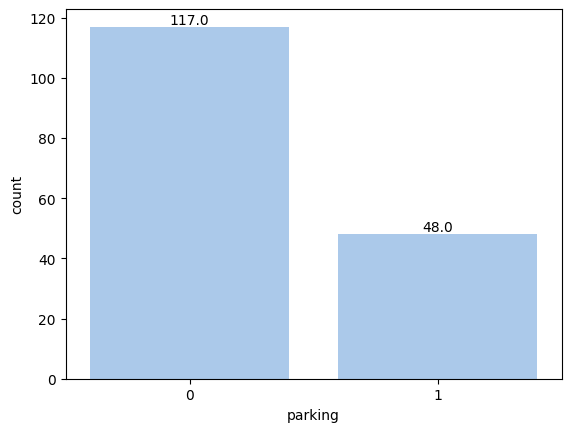

In [ ]:
ax = sns.countplot(df, x="parking")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

#### Variable ASCENSEUR (ascensor)

In [ ]:
def extract_ascenseur(tag):
  if isinstance(tag, str):
    if 'ascenseur' in tag:
      return 1
  return 0

# Applique la fonction à la colonne 'tags'
df['ascenseur'] = df['tags'].apply(extract_ascenseur)
df_a_predecir['ascenseur'] = df_a_predecir['tags'].apply(extract_ascenseur)

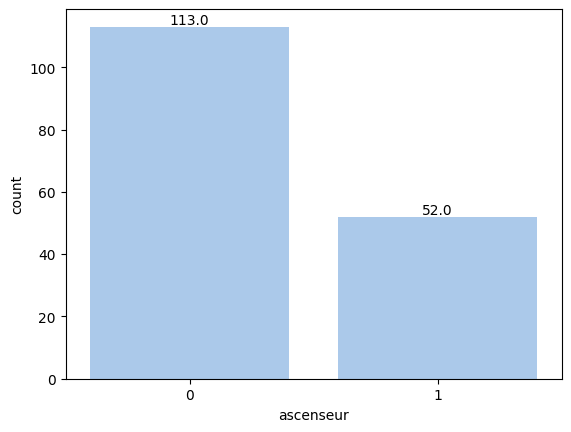

In [ ]:
ax = sns.countplot(df, x="ascenseur")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

#### Variable BOX (garaje)

In [ ]:
def extract_box(tag):
  if isinstance(tag, str):
    if 'box' in tag:
      return 1
  return 0

# Applique la fonction à la colonne 'tags'
df['box'] = df['tags'].apply(extract_box)
df_a_predecir['box'] = df_a_predecir['tags'].apply(extract_box)

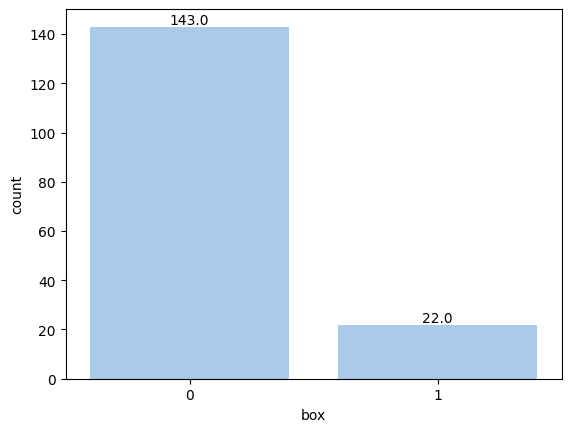

In [ ]:
ax = sns.countplot(df, x="box")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

#### Variable JARDIN

In [ ]:
def extract_jardin(tag):
  if isinstance(tag, str):
    if 'jardin' in tag:
      return 1
  return 0

# Applique la fonction à la colonne 'tags'
df['jardin'] = df['tags'].apply(extract_jardin)
df_a_predecir['jardin'] = df_a_predecir['tags'].apply(extract_jardin)

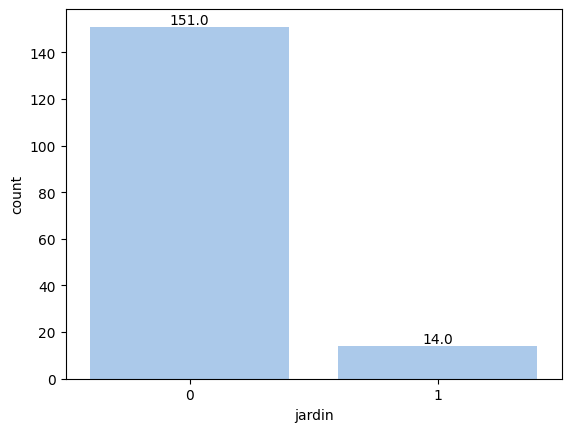

In [ ]:
ax = sns.countplot(df, x="jardin")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

#### Variable PISCINE (piscina)

In [ ]:
def extract_piscine(tag):
  if isinstance(tag, str):
    if 'piscine' in tag:
      return 1
  return 0

# Applique la fonction à la colonne 'tags'
df['piscine'] = df['tags'].apply(extract_piscine)
df_a_predecir['piscine'] = df_a_predecir['tags'].apply(extract_piscine)

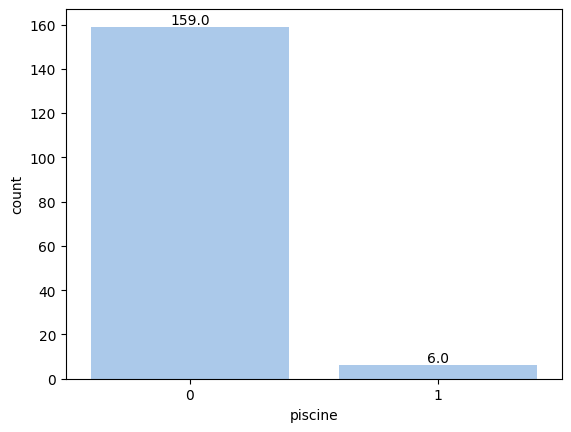

In [ ]:
ax = sns.countplot(df, x="piscine")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

### Variable: SOLD

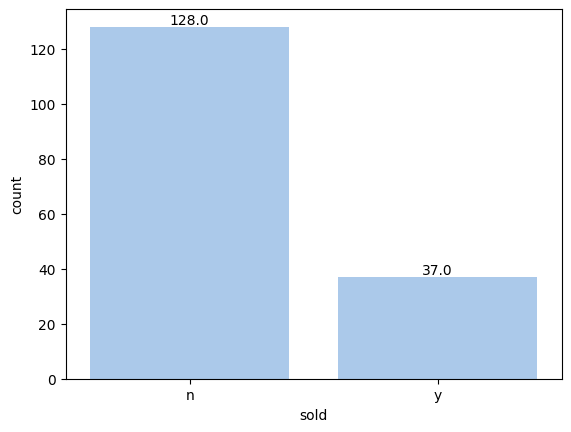

In [ ]:
ax = sns.countplot(df, x="sold")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

### Variable: SELLING TIME

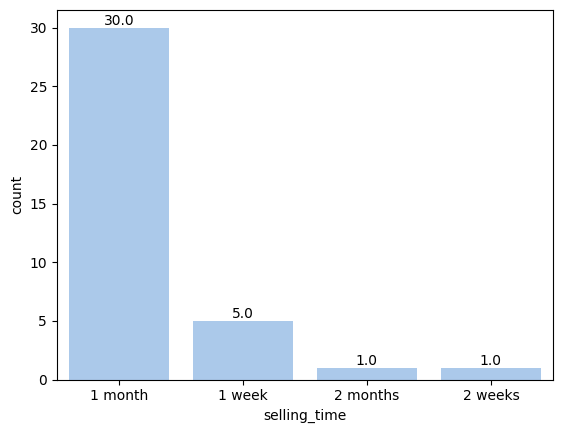

In [ ]:
ax = sns.countplot(df, x="selling_time")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()

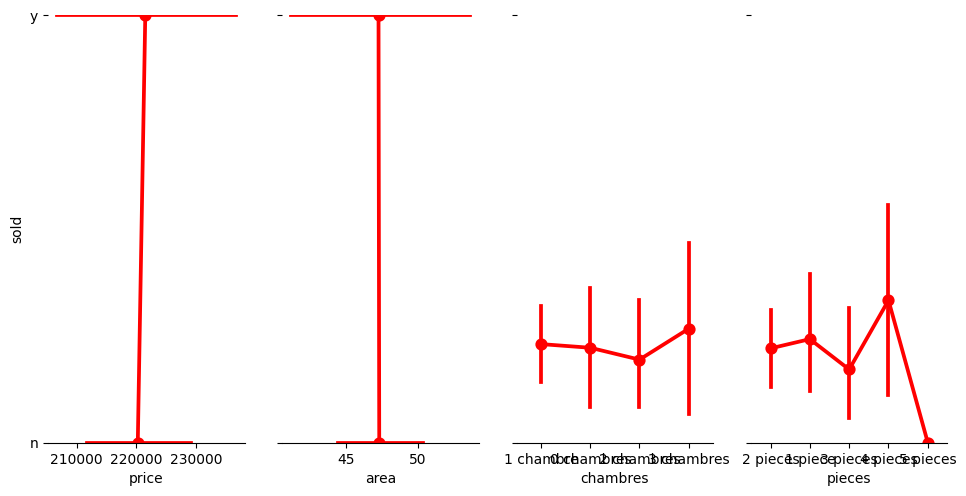

In [ ]:
g = sns.PairGrid(df, y_vars="sold",
                 x_vars=["price", "area", "chambres", "pieces"],
                 height=5, aspect=.5)
g.map(sns.pointplot, color="red")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

### Variable: OLD PRICE

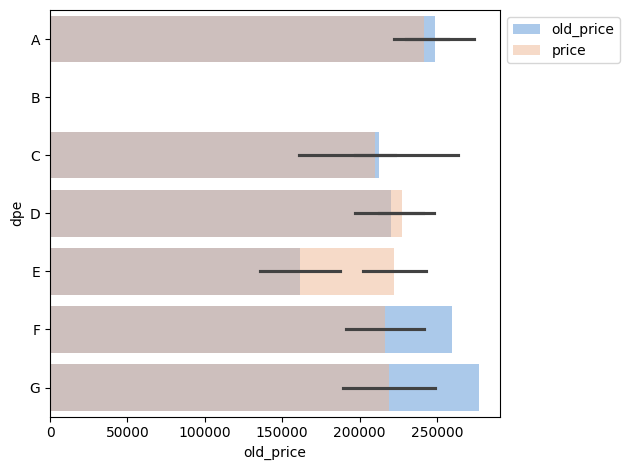

In [ ]:
category_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

palette = sns.color_palette("pastel", n_colors=2)

sns.barplot(x="old_price", y=df['dpe'], data=df,
            label="old_price", order=category_order, color=palette[0])

sns.barplot(x="price", y=df['dpe'], data=df,
            label="price", color=palette[1], order=category_order, alpha=0.5)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

### Tabla y gráfico de correlaciones entre las variables numéricas

In [ ]:
df.corr(numeric_only=True)

,area,contact_is_private_seller,price,price_decrease_percent,rooms,transaction_type,old_price,balcon,terrasse,parking,ascenseur,box,jardin,piscine
area,1.000000,0.046909,0.477043,0.056332,0.851893,0.073553,0.707086,0.180452,-0.128810,-0.021012,-0.189709,0.132320,-0.007785,-0.118779
contact_is_private_seller,0.046909,1.000000,0.025477,-0.047275,-0.011320,-0.033635,0.036751,0.034776,-0.006516,-0.113228,0.032286,0.034669,0.073051,-0.034340
price,0.477043,0.025477,1.000000,-0.190017,0.395798,0.150755,0.957026,0.145977,0.141181,0.125044,-0.028742,0.032717,0.064449,-0.068378
price_decrease_percent,0.056332,-0.047275,-0.190017,1.000000,0.130334,-0.089584,0.032447,0.128682,-0.090225,-0.097342,0.054282,0.084188,-0.091958,-0.055313
rooms,0.851893,-0.011320,0.395798,0.130334,1.000000,0.091208,0.472268,0.037540,-0.025729,-0.035377,-0.186793,0.174565,0.100000,-0.087699
transaction_type,0.073553,-0.033635,0.150755,-0.089584,0.091208,1.000000,0.191696,-0.127263,0.169324,-0.121870,-0.129072,-0.074630,0.478559,-0.036961
old_price,0.707086,0.036751,0.957026,0.032447,0.472268,0.191696,1.000000,0.319571,-0.178733,-0.123384,-0.166078,0.180429,-0.016028,NaN
balcon,0.180452,0.034776,0.145977,0.128682,0.037540,-0.127263,0.319571,1.000000,-0.247994,0.004725,0.139095,0.046297,-0.203661,-0.129930
terrasse,-0.128810,-0.006516,0.141181,-0.090225,-0.025729,0.169324,-0.178733,-0.247994,1.000000,0.160349,0.086074,0.101205,0.226879,0.097859
parking,-0.021012,-0.113228,0.125044,-0.097342,-0.035377,-0.121870,-0.123384,0.004725,0.160349,1.000000,-0.032379,-0.172720,-0.099257,0.231999


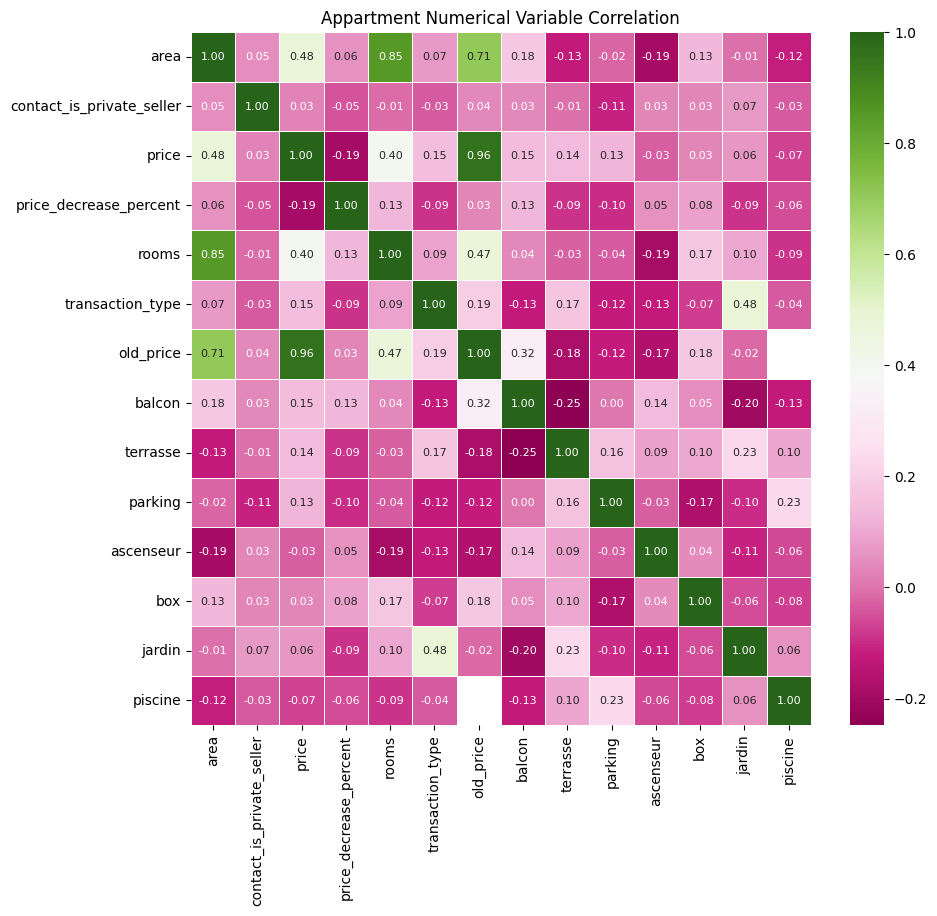

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)
plt.subplots(figsize=(10,9))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap='PiYG', fmt=".2f", annot_kws={"size":8})
plt.title("Appartment Numerical Variable Correlation")
plt.show()

In [ ]:
df['old_price'].fillna(0, inplace=True)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df = pd.get_dummies(df)
print(df)

     area  contact_is_private_seller   price  price_decrease_percent  rooms  \
0      20                          0  103000                6.363636    2.0   
1      23                          0  120000                0.000000    1.0   
2      31                          0  125000                0.000000    2.0   
3      30                          0  128000                5.185185    2.0   
4      27                          0  130000                7.142857    1.0   
..    ...                        ...     ...                     ...    ...   
160    31                          0  144000                0.000000    1.0   
161    45                          0  219000                0.000000    1.0   
162    50                          0  267925                0.000000    3.0   
163    30                          0  220000                0.000000    1.0   
164    80                          0  256800                0.000000    4.0   

     transaction_type  old_price  balcon  terrasse 

## **3. ML Manual Analysis**
---



### Separar la tabla en dos: Entrenamiento y Prueba

In [ ]:
X = df.drop(columns=["price"])
# X = df.drop(columns=["price", "price_decrease_percent", "selling_time", "contact_is_private_seller", "district", "dpe", "estate_type", "ges"])
y = df["price"]

column_names = X.columns

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,area,contact_is_private_seller,price_decrease_percent,rooms,transaction_type,old_price,balcon,terrasse,parking,ascenseur,...,chambres_2 chambres,chambres_3 chambres,etages_0,etages_1,etages_2,etages_3,etages_4,etages_5,etages_6,etages_7
84,77,0,5.241935,4.0,2,248000.0,1,1,0,1,...,False,True,False,True,False,False,False,False,False,False
2,31,0,0.000000,2.0,2,0.0,0,0,0,0,...,False,False,True,False,False,False,False,False,False,False
94,76,0,19.230769,4.0,2,260000.0,1,0,0,0,...,False,True,True,False,False,False,False,False,False,False
45,52,0,0.000000,2.0,2,0.0,1,1,0,1,...,False,False,False,False,False,True,False,False,False,False
42,61,0,0.000000,2.0,2,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,54,0,0.000000,2.0,2,0.0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
106,72,0,0.000000,3.0,2,0.0,1,0,1,0,...,True,False,False,True,False,False,False,False,False,False
14,36,0,0.000000,1.0,2,0.0,0,0,0,1,...,False,False,True,False,False,False,False,False,False,False
92,89,0,0.000000,5.0,2,0.0,0,1,0,0,...,False,True,False,False,True,False,False,False,False,False


In [ ]:
y_train

,price
84,235000
2,125000
94,210000
45,199000
42,198000
...,...
71,230000
106,278200
14,150000
92,258800


### Feature Scaling o convertir todos los numeros a un rango similar (StandardScaler y MinMaxScaler)

#### MinMaxScaler o Normalización

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_train = X_train.select_dtypes(include=[np.number]).values
data_test = X_test.select_dtypes(include=[np.number]).values

X_train_scaled = scaler.fit_transform(data_train)
X_test_scaled = scaler.fit_transform(data_test)

print(X_train_scaled)

[[0.7037037  0.         0.39420703 ... 0.         0.         0.        ]
 [0.13580247 0.         0.16720257 ... 0.         0.         0.        ]
 [0.69135802 0.         1.         ... 1.         0.         0.        ]
 ...
 [0.19753086 0.         0.16720257 ... 0.         0.         0.        ]
 [0.85185185 0.         0.16720257 ... 1.         0.         0.        ]
 [0.08641975 0.         0.16720257 ... 0.         0.         0.        ]]


#### StandardScaler o Z-Score Normalization

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_train = X_train.select_dtypes(include=[np.number]).values
data_test = X_test.select_dtypes(include=[np.number]).values

X_train_scaled = scaler.fit_transform(data_train)
X_test_scaled = scaler.transform(data_test)

print(X_train_scaled)

[[ 1.64859859 -0.15249857  1.61453056 ... -0.37139068 -0.28629917
  -0.21821789]
 [-0.96164669 -0.15249857 -0.29502771 ... -0.37139068 -0.28629917
  -0.21821789]
 [ 1.59185413 -0.15249857  6.71045234 ...  2.6925824  -0.28629917
  -0.21821789]
 ...
 [-0.67792437 -0.15249857 -0.29502771 ... -0.37139068 -0.28629917
  -0.21821789]
 [ 2.32953214 -0.15249857 -0.29502771 ...  2.6925824  -0.28629917
  -0.21821789]
 [-1.18862454 -0.15249857 -0.29502771 ... -0.37139068 -0.28629917
  -0.21821789]]


### Crear y entrenar Caja Negra

In [ ]:
columns_with_nan_X_train = np.where(np.isnan(X_train_scaled).any(axis=0))[0]
columns_with_nan_names_X_train = column_names[columns_with_nan_X_train]
print(X_train_scaled[:, columns_with_nan_X_train])
print(f"Columnas con valores nulos en X_train_scaled: {columns_with_nan_names_X_train}")

columns_with_nan_X_test = np.where(np.isnan(X_test_scaled).any(axis=0))[0]
columns_with_nan_names_X_test = column_names[columns_with_nan_X_test]
print(X_test_scaled[:, columns_with_nan_X_test])
print(f"Columnas con valores nulos en X_test_scaled: {columns_with_nan_names_X_test}")

[]
Columnas con valores nulos en X_train_scaled: Index([], dtype='object')
[]
Columnas con valores nulos en X_test_scaled: Index([], dtype='object')


#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

### Clasificacion de Cajas Negras por Algoritmo utilizado

### Realizar predicción

Predicción de tabla de entrenamiento

In [ ]:
train_pred = model.predict(X_train_scaled)
print(train_pred)

[236133.9        134042.         212212.5        218676.
 205970.         234552.         197418.66666667 164796.
 176003.         280277.4        261299.5        130920.
 182039.         247998.33333333 181099.9        270153.25
 236481.9        248666.5        171240.66       224685.
 218621.         182972.         184071.33       232337.5
 197654.33       218414.         205084.         165452.65
 216914.99       200580.         197871.         265208.83333333
 235041.66666667 168568.99       247239.         258102.
 114500.         281280.         258102.         226656.33333333
 200299.         205142.         194319.         211242.
 280491.5        179394.         188433.5        277889.
 230708.         236248.         198985.         255047.5
 260008.         159166.         261230.         207880.
 269004.         202330.         222835.         194272.
 268938.7        267465.66666667 285097.7        238278.75
 201334.82666667 243194.25       276511.         228198.
 145809

Predicción de tabla de prueba

In [ ]:
test_pred = model.predict(X_test_scaled)
print(test_pred)

[246619.         226447.         270475.5        228566.
 211994.3        233770.61       257064.65       220232.98
 215396.33333333 160160.66       249481.83333333 220248.
 193317.33333333 217926.         206404.         178936.
 223521.32       276511.         254515.9        232767.33
 197773.         187776.5        162496.66666667 135132.
 167727.         178936.         229512.         247368.
 191887.66666667 219292.33       200344.33       253177.
 233158.5       ]


### Calcular errores

#### Error de entrenamiento

##### MSE y RMSE

In [ ]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, train_pred)
rmse_train = np.sqrt(mse_train)

print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")

Mean Squared Error (MSE): 258245492.5813187
Root Mean Squared Error (RMSE): 16070.01843749156


##### Coeficiente de Determinación R2

In [ ]:
from sklearn import metrics

r2_train = metrics.r2_score(y_train, train_pred)

print(f"Coeficiente de Determinación R2: {r2_train}")

Coeficiente de Determinación R2: 0.9000551034283875


In [ ]:
errors_train = pd.DataFrame(
    {"MSE":[mse_train],
     "RMSE":[rmse_train],
     "R2":[r2_train]})

#### Error de prueba

##### MSE y RMSE

In [ ]:
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, test_pred)
rmse_test = np.sqrt(mse_test)

print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")

Mean Squared Error (MSE): 1355992837.2348058
Root Mean Squared Error (RMSE): 36823.80802191438


##### Coeficiente de Determinación R2

In [ ]:
from sklearn import metrics

r2_test = metrics.r2_score(y_test, test_pred)

print(f"Coeficiente de Determinación R2: {r2_test}")

Coeficiente de Determinación R2: 0.3979544041505586


In [ ]:
errors_test = pd.DataFrame(
    {"MSE":[mse_test],
     "RMSE":[rmse_test],
     "R2":[r2_test]})

### Comprobar que la Caja Negra esta bien entrenada - Sesgo y Varianza (Bias y Variance)

In [ ]:
errors_train['set'] = 'train'
errors_test['set'] = 'test'

pd.concat([errors_train, errors_test], axis=0, ignore_index=True)

,MSE,RMSE,R2,set
0,2.582455e+08,16070.018437,0.900055,train
1,1.355993e+09,36823.808022,0.397954,test


**Sesgo Bajo y Varianza Alta:**
- Error de Entrenamiento:  1% (**bajo**)
- Error de Prueba: 10% (**mucho mayor al de entrenamiento**)

**Sesgo Alto y Varianza Baja:**
- Error de Entrenamiento: 15% (**alto**)
- Error de Prueba: 16% (**similar al de entrenamiento**)

**Sesgo Alto y Varianza Alta:**
- Error de Entrenamiento: 15% (**alto**)
- Error de Prueba: 30% (**mucho mayor al de entrenamiento**)

**Sesgo Bajo y Varianza Baja (lo que buscamos):**
- Error de Entrenamiento:  0.5% (**bajo**)
- Error de Prueba:  1.0% (**bajo**)

El objetivo es obtener los errores de Entrenamiento y Prueba bajos.

- El **Error de Entrenamiento alto** (tambien conocido como **Underfitting** en ingles) puede estar dado por una de las siguientes condiciones:
  - Necesitamos mas datos para entrenar nuestra caja negra
  - Necesitamos una caja negra que pueda predecir datos complejos, por ejemplo los ensambles pueden predecir datos mas complejos que una regresion lineal porque no asumen ninguna hipotesis respecto a los datos.
- El **Error de Prueba alto** (tambien conocido como **Overfitting** en ingles) puede estar dado por una de las siguientes condiciones:
  - Necesitamos mas datos para entrenar nuestra caja negra
  - Necesitamos una caja negra mas simple o un metodo para evitar que la caja negra se ajuste demasiado a los datos de prueba. Estos metodos se llaman de **regularizacion**

<font color="red">Escribir conclusiones aquí.</font>

### Otras metricas

Ya hemos analizado las dos métricas más utilizadas en modelos de regresión (MSE-RMSE y R2). Existen más métricas para modelos de clasificación, pero por razones obvias no se van a aplicar en este ejercicio:

- **Precision**: TP / (TP + FP) proporcion de datos predecidos correctamente sobre el total de predecidos como de la clase positiva
- **Recall**: TP / (TP + FN) proporcion de datos predecidos correctamente sobre el total real de datos de la clase positiva
- **F1 Score**: 2 / (1/P + 1/R) medida que contempla ambas metricas de precision y recall
- **ROC curve**: Nos muestra una curva con la precision en el eje x y recall en el eje y
- **Area Under ROC Curve**: es el area debajo de la curva ROC y es una medida de la capacidad del clasificador para separar las clases

### Separar de nuevo las tablas: Entrenamiento, Validacion y Prueba

### Validacion Cruzada (Cross Validation)

## **4. AutoML: Machine Learning Automatico**
---

In [ ]:
# NOT WORKING

# !pip install --upgrade pip setuptools wheel
# !pip install scikit-learn==0.24.2
# !pip install auto-sklearn

In [ ]:
# A WORKAROUND TO GET AUTOSKLEARN INSTALLED - WHICH IS ALSO NOT WORKING

# !pip install -q condacolab
# import condacolab
# condacolab.install()

In [ ]:
# !mamba create -n sklearn-env python=3.8
# !source activate sklearn-env
# !mamba install -c conda-forge auto-sklearn

### **FLAML**
---

In [ ]:
!pip install "flaml[automl]"

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train_scaled, y_train, task="regression", time_budget=10)

[flaml.automl.logger: 08-09 11:57:03] {1680} INFO - task = regression
[flaml.automl.logger: 08-09 11:57:03] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 08-09 11:57:03] {1789} INFO - Minimizing error metric: 1-r2
[flaml.automl.logger: 08-09 11:57:04] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.logger: 08-09 11:57:04] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 08-09 11:57:04] {2345} INFO - Estimated sufficient time budget=4768s. Estimated necessary time budget=41s.
[flaml.automl.logger: 08-09 11:57:04] {2392} INFO -  at 0.6s,	estimator lgbm's best error=1.0235,	best estimator lgbm's best error=1.0235
[flaml.automl.logger: 08-09 11:57:04] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 08-09 11:57:04] {2392} INFO -  at 0.7s,	estimator lgbm's best error=1.0235,	best estimator lgbm's best error=1.0235
[flaml.automl.logger: 08-09 11:57:04] {2

In [ ]:
automl.best_estimator

'lgbm'

In [ ]:
automl.best_config

{'n_estimators': 4,
 'num_leaves': 4,
 'min_child_samples': 16,
 'learning_rate': 0.4846294486750497,
 'log_max_bin': 7,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.011976373168508215,
 'reg_lambda': 7.45818359196598}

In [ ]:
automl.best_loss

0.9258624944637134

Probamos con nuestra tabla de prueba para ver que tan bien se desempeña en ella este modelo elegido por la libreria

In [ ]:
# UNABLE TO IMPORT autosklearn.regression BECAUSE UNABLE TO INSTALL auto-sklearn

# import autosklearn.regression
# import sklearn.model_selection
# import sklearn.datasets
# import sklearn.metrics
# from sklearn.metrics import mean_squared_error

# reg = autosklearn.regression.AutoSklearnRegressor()

# reg.fit(X_train_scaled, y_train)
# predictions = reg.predict(X_test_scaled)
# mse = mean_squared_error(y_test, test_pred)
# print(f"Mean Squared Error: {mse}")

## **6. Interpretar los resultados de ML**
---

### Permutation Importance

In [ ]:
# !pip install scikit-learn==1.2.2 eli5==0.11.0
# !pip install eli5
!pip install --upgrade eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
best_model = automl.model

perm = PermutationImportance(best_model, random_state=1).fit(X_test_scaled, y_test)

eli5.show_weights(perm, feature_names=df.columns.tolist())

ValueError: feature_names has a wrong length: expected=13, got=392

### **AutoGluon**
---

In [ ]:
!pip install autogluon

Cargamos los datos de entrenamiento en la clase especial de AutoGluon llamada TabularDataset

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
train_data = TabularDataset(df_train)
train_data.head()

In [ ]:
y_train = df_train.loc[:, "price"]
y_train.head()

Entrenamos varios modelos

In [ ]:
predictor = TabularPredictor(label='price').fit(train_data)

Cargamos los datos de prueba

In [ ]:
test_data = TabularDataset(df_test)

In [ ]:
predictor.evaluate(test_data, silent=True)

In [ ]:
y_pred = predictor.predict(test_data.drop(columns=['price']))
y_pred.head()

## **5. Automatic Analysis**
---

### **Pycaret**
---

In [ ]:
# INCOMPATIBLE CON AUTOGLUON, REINICIAR SESIÓN ANTES DE LANZAR PYCARET

import os
os.kill(os.getpid(), 9)

In [ ]:
!pip install shap -U -q
!pip install pycaret -U -q

In [ ]:
if 'price' not in df.columns:
    raise ValueError("The DataFrame does not contain a column named 'price'")
else: print('tout va bien')

In [ ]:
from pycaret.regression import *
s = setup(df, target='price', session_id=42)

In [ ]:
get_config('X_train_transformed')

In [ ]:
best = compare_models()

In [ ]:
predictions = predict_model(best, data = df_a_predecir)
predictions.head()

# **Dataset 2: Datos del Catastro de las transacciones reales de compraventa de los últimos 5 años (2019 a 2024) SELLING PRICE**

Enlace hacia el dataset de las cifras oficiales del Colegio de Notarios de Francia (última actualización: abril de 2024): https://explore.data.gouv.fr/fr/immobilier?onglet=carte&filtre=tous

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Módulo 6 - Machine Learning/Reto ML/dvf.csv", encoding='utf-8')
df.head(2)

df_a_predecir = pd.read_csv("/content/drive/MyDrive/Módulo 6 - Machine Learning/Reto ML/a_predecir.csv", encoding='utf-8')
# df_a_predecir.head(2)

In [ ]:
df = df.drop(columns=['numero_disposition', 'adresse_suffixe', 'adresse_code_voie', 'code_commune', 'code_departement', 'code_postal', 'ancien_code_commune', 'ancien_nom_commune',
                      'ancien_id_parcelle', 'nom_commune', 'numero_volume', 'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale', 'nature_culture_speciale',
                      'lot1_numero', 'lot2_numero', 'lot3_numero', 'lot4_numero', 'lot5_numero'])

df_a_predecir = df_a_predecir.drop(columns=['numero_disposition', 'adresse_suffixe', 'adresse_code_voie', 'code_commune', 'code_departement', 'code_postal', 'ancien_code_commune', 'ancien_nom_commune',
                      'ancien_id_parcelle',  'nom_commune', 'numero_volume', 'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale', 'nature_culture_speciale',
                      'lot1_numero', 'lot2_numero', 'lot3_numero', 'lot4_numero', 'lot5_numero'])

# df.head(2)

In [ ]:
df.info()

In [ ]:
df['valeur_fonciere'] = pd.to_numeric(df['valeur_fonciere'], errors='coerce').fillna(0).astype(int)
df_a_predecir['valeur_fonciere'] = pd.to_numeric(df_a_predecir['valeur_fonciere'], errors='coerce').fillna(0).astype(int)

In [ ]:
df['lot_surface_carrez'] = df[['lot1_surface_carrez', 'lot2_surface_carrez', 'lot3_surface_carrez', 'lot4_surface_carrez', 'lot5_surface_carrez']].sum(axis=1)
df_a_predecir['lot_surface_carrez'] = df_a_predecir[['lot1_surface_carrez', 'lot2_surface_carrez', 'lot3_surface_carrez', 'lot4_surface_carrez', 'lot5_surface_carrez']].sum(axis=1)

df = df.drop(columns=['lot1_surface_carrez', 'lot2_surface_carrez', 'lot3_surface_carrez', 'lot4_surface_carrez', 'lot5_surface_carrez'])
df_a_predecir = df_a_predecir.drop(columns=['lot1_surface_carrez', 'lot2_surface_carrez', 'lot3_surface_carrez', 'lot4_surface_carrez', 'lot5_surface_carrez'])

print(df)

In [ ]:
df.corr(numeric_only=True)

### Pycaret

In [ ]:
!pip install shap -U -q
!pip install pycaret -U -q

In [ ]:
from pycaret.regression import *
s = setup(df, target='valeur_fonciere', session_id=1)

In [ ]:
get_config('X_train_transformed')

In [ ]:
best = compare_models()

In [ ]:
predictions = predict_model(best, data = df_a_predecir)
predictions.head()

# Gradio

In [1]:
pip install gradio -q -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 458.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 4.9 MB/s eta 0:00:00


In [2]:
import gradio as gr

In [4]:
def saludo(nombre, intensidad):
    return "Hola, " + nombre + "!" * int(intensidad)

In [6]:
demo = gr.Interface(
    fn=saludo,
    inputs=["text", "slider"],
    outputs=["text"],
    allow_flagging='never'
)
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://88204712644e4f276a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [7]:
mi_input = gr.Textbox(label="Nombre", placeholder="Cual es tu nombre?")
mi_output = gr.Textbox(label="Salida", lines=10)

In [8]:
demo = gr.Interface(
    fn=saludo,
    inputs=[mi_input, "slider"],
    outputs=[mi_output],
    allow_flagging='never'
)
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0a0a46185e732527be.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("curated_list.csv")

def filter_map(min_price, max_price, boroughs):

    filtered_df = df[(df['neighbourhood_group'].isin(boroughs)) &
          (df['price'] > min_price) & (df['price'] < max_price)]
    names = filtered_df["name"].tolist()
    prices = filtered_df["price"].tolist()
    text_list = [(names[i], prices[i]) for i in range(0, len(names))]
    fig = go.Figure(go.Scattermapbox(
            customdata=text_list,
            lat=filtered_df['latitude'].tolist(),
            lon=filtered_df['longitude'].tolist(),
            mode='markers',
            marker=go.scattermapbox.Marker(
                size=6
            ),
            hoverinfo="text",
            hovertemplate='<b>Name</b>: %{customdata[0]}<br><b>Price</b>: $%{customdata[1]}'
        ))

    fig.update_layout(
        mapbox_style="open-street-map",
        hovermode='closest',
        mapbox=dict(
            bearing=0,
            center=go.layout.mapbox.Center(
                lat=40.67,
                lon=-73.90
            ),
            pitch=0,
            zoom=9
        ),
    )

    return fig

with gr.Blocks() as demo:
    with gr.Column():
        with gr.Row():
            min_price = gr.Number(value=250, label="Minimum Price")
            max_price = gr.Number(value=1000, label="Maximum Price")
        boroughs = gr.CheckboxGroup(choices=["Queens", "Brooklyn", "Manhattan", "Bronx", "Staten Island"], value=["Queens", "Brooklyn"], label="Select Boroughs:")
        btn = gr.Button(value="Update Filter")
        map = gr.Plot().style()
    demo.load(filter_map, [min_price, max_price, boroughs], map)
    btn.click(filter_map, [min_price, max_price, boroughs], map)

demo.launch()